# Generating images using DALL-E
In this notebook we will demonstrate how to ask openAI's DALL-E model to generate some images. Depending on what we request and how the model was trained, the results may be more or less appropriate. We will again use a small helper function to return the image directly.

Read more:
* [openAI image generation documentation](https://platform.openai.com/docs/guides/images/usage)

In [1]:
from openai import OpenAI
from skimage.io import imread, imshow
from numpy import random
import matplotlib.pyplot as plt
from IPython.core.magic import register_line_cell_magic

In [2]:
@register_line_cell_magic
def image(line:str, cell:str="", width:int=256, height:int=256, model='dall-e-2', show_result=True):
    """A helper function for generating images using OpenAI's dall-e model"""
    message = line + "\n" + cell
    client = OpenAI()
    response = client.images.generate(
      model=model,
      prompt=message,
      n=1,
      size=f"{width}x{height}"
    )
    image_url = response.data[0].url
    image = imread(image_url)

    if show_result:
        imshow(image)
    else:
        return image

When generating scientific images, they may, or may not be a proper representation. Presumably, DALL-E was trained on many natural images (showing cars, trees, houses, etc.) and not so many images of cells.

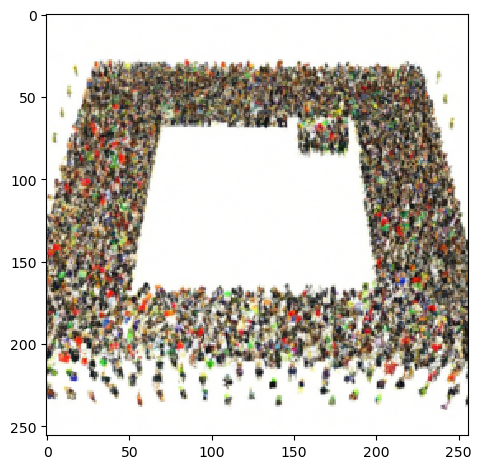

In [3]:
%%image 
an image of 100 people photographed from distance

## 

In [4]:
@register_line_cell_magic
def fake_cat_images(line:str, cell:str=""):
    prompt = line + "\n" + cell
    images = [imread('real_cat.png')]
    for _ in range(3):
        images.append(image(prompt, show_result=False))
    random.shuffle(images)
    fix, ax = plt.subplots(1,len(images), figsize=(15,15))
    for i, img in enumerate(images):
        ax[i].imshow(img)

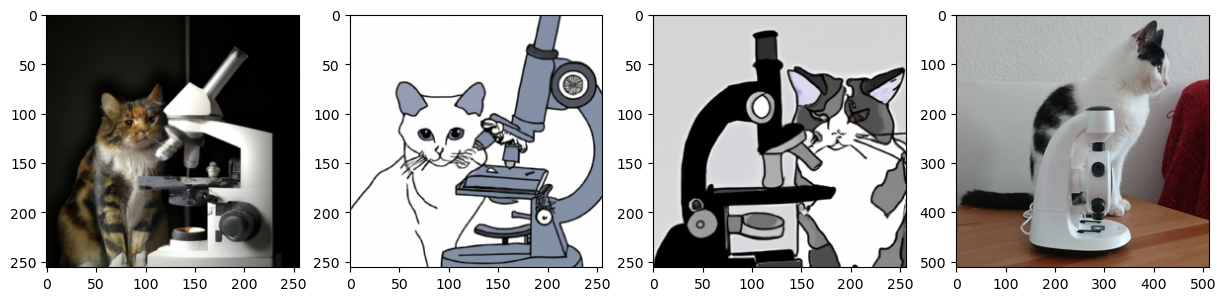

In [5]:
%%fake_cat_images
Image of a cat sitting behind a microscope.

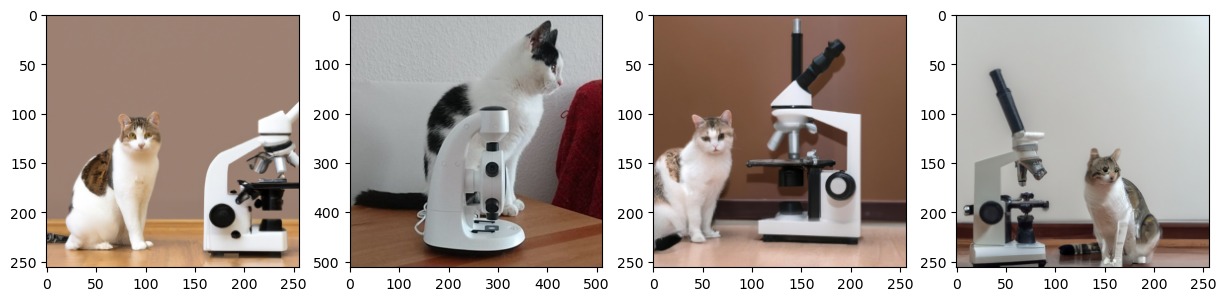

In [6]:
%%fake_cat_images
Image of a cat sitting behind a microscope.
Both are on a brown floor in front of a white wall.
The cat is mostly white and has some black dots.
The cat sits straight.
The cat is a bit larger than the microsope.

## Exercise
Generate a comic of 25 students sitting in a living lab.